In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
"""Busca el valor maximo de una funcion en cierto intervalo"""
def valor_maximo(fun, a, b):
    m = 0
    for i in np.arange(a,b+1):
        if(fun(i) > fun(m)):
            m = i
    return fun(m)

"""Busca el valor minimo de una funcion en cierto intervalo"""
def valor_minimo(fun, a, b):
    m = 0
    for i in np.arange(a,b+1):
        if(fun(i) < fun(m)):
            m = i
    return fun(m)

def f(x):
    return (2*x)

In [3]:
"""Calcula la integral definida de una funcion mediante 
el metodo MonteCarlo haciendo uso de un bucle"""
def integra_mc_bucle(fun, a, b, num_puntos=10000):
    Nunder = 0
    
    M = valor_maximo(fun, a, b)
    m = valor_minimo(fun, a, b)

    for i in range(num_puntos):
        x = np.random.uniform(a,b)
        y = np.random.uniform(m,M)
        if y < fun(x):
            Nunder += 1

    I = ((Nunder / num_puntos) * (b-a) * M)
    return I

In [4]:
integra_mc_bucle(f,1,10)

99.4248

In [5]:
"""Calcula la integral definida de una funcion mediante 
el metodo MonteCarlo haciendo uso de operaciones con vectores"""
def integra_mc_vector(fun, a, b, num_puntos=10000):
    Nunder = 0
    
    M = valor_maximo(fun, a, b)
    m = valor_minimo(fun, a, b)
    
    x = np.random.uniform(a,b,num_puntos)
    y = np.random.uniform(m,M,num_puntos)
    Nunder= np.count_nonzero((y < fun(x)))

    
    I = ((Nunder / num_puntos) * (b-a) * M)
    return I

In [8]:
print(integrate.quad(f, 1, 10))
print(integra_mc_bucle(f,1,10))
print(integra_mc_vector(f,1,10))

(99.0, 1.099120794378905e-12)
98.98920000000001
98.58599999999998


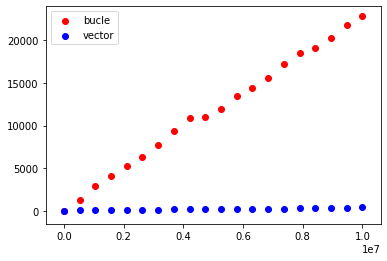

In [27]:
def compara_tiempos(f,a,b):
    sizes = np.linspace(100, 10000000, 20)
    times_bucle = []
    times_vector = []
    for size in sizes:
        tic = time.process_time()
        integra_mc_bucle(f, a, b, int(size))
        toc = time.process_time()
        times_bucle += [1000*(toc-tic)]
        
        tic = time.process_time()
        integra_mc_vector(f, a, b, int(size))
        toc = time.process_time()
        times_vector += [1000*(toc-tic)]

    plt.figure()
    plt.scatter(sizes, times_bucle, c='red', label='bucle')
    plt.scatter(sizes, times_vector, c='blue', label='vector')
    plt.legend()
    plt.show()
    
compara_tiempos(f,1,10)